# **Project Name**    - Integrated Retail Analytics for Store Optimization



##### **Project Type**    - EDA & Classification
##### **Contribution**    - Individual

# **Project Summary -**
The Integrated Retail Analytics for Store Optimization project leverages advanced machine learning to enhance store performance by analyzing sales, inventory, and customer data. The system preprocesses retail datasets, applies predictive and segmentation models, and generates actionable insights to optimize product assortments, improve inventory management, and boost customer engagement. Visual dashboards deliver key performance indicators and recommendations, enabling data-driven strategies for maximizing retail efficiency and profitability.

# **GitHub Link -**
https://github.com/gvdharun/Integrated-Retail-Analytics-for-Store-Optimization.git

# **Problem Statement**
Retail stores face challenges in optimizing inventory management, sales forecasting, and customer engagement due to fragmented data and lack of actionable insights. This project aims to leverage advanced machine learning techniques to analyze retail data, identify patterns, and provide data-driven recommendations to improve store performance, optimize inventory, and enhance customer targeting strategies for increased profitability and operational efficiency.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from scipy.stats import ttest_ind,f_oneway
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

### Dataset Loading

In [2]:
# Load Dataset
features = pd.read_csv('data/features data set.csv')
sales = pd.read_csv('data/sales data-set.csv')
store = pd.read_csv('data/stores data-set.csv')

### Dataset First View

In [3]:
# Dataset First Look
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Number of rows in features dataset: {features.shape[0]}")
print(f"Number of columns in features dataset: {features.shape[1]}\n")
print(f"Number of rows in sales dataset: {sales.shape[0]}")
print(f"Number of columns in sales dataset: {sales.shape[1]}\n")
print(f"Number of rows in store dataset: {store.shape[0]}")
print(f"Number of columns in store dataset: {store.shape[1]}")

Number of rows in features dataset: 8190
Number of columns in features dataset: 12

Number of rows in sales dataset: 421570
Number of columns in sales dataset: 5

Number of rows in store dataset: 45
Number of columns in store dataset: 3


### Dataset Information

In [7]:
# Dataset Info
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print(f"Duplicate values in features dataset: {features.duplicated().sum()}")
print(f"Duplicate values in sales dataset: {sales.duplicated().sum()}")
print(f"Duplicate values in store dataset: {store.duplicated().sum()}")

Duplicate values in features dataset: 0
Duplicate values in sales dataset: 0
Duplicate values in store dataset: 0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print(f"Missing values in features dataset:\n {features.isnull().sum()}\n")
print(f"Missing values in sales dataset:\n {sales.isnull().sum()}\n")
print(f"Missing values in store dataset:\n {store.isnull().sum()}")

Missing values in features dataset:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values in sales dataset:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Missing values in store dataset:
 Store    0
Type     0
Size     0
dtype: int64


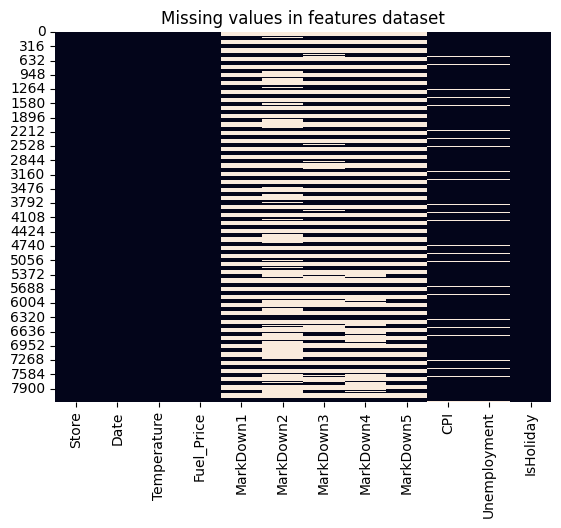

In [12]:
# Visualizing the missing values
sns.heatmap(features.isnull(), cbar=False)
plt.title('Missing values in features dataset')
plt.show()

### What did you know about your dataset?

#### Dataset Overview

The dataset comprises three main components: features, sales, and store information.

- **Features Dataset:**
  - Contains 8190 rows and 12 columns.
  - Includes variables such as Store ID, Date, Temperature, Fuel Price, Marketing Markdowns (MarkDown1 to MarkDown5), CPI, Unemployment rate, and Holiday indicator.
  - Contains missing values primarily in the MarkDown columns (ranging from 2921 to 4050 non-null entries) and fewer missing values in CPI and Unemployment columns (7605 non-null entries each).
  - No duplicate rows were found.

- **Sales Dataset:**
  - Contains 421570 rows and 5 columns.
  - Includes Store ID, Department ID, Date, Weekly Sales, and Holiday indicator.
  - No missing values or duplicates were present.

- **Store Dataset:**
  - Contains 45 rows and 3 columns.
  - Includes Store ID, Store Type, and Size.
  - No missing values or duplicates were found.

#### Summary:
- The features dataset has notable missing data in the marketing markdown features and economic indicators (CPI and Unemployment). Imputation or handling strategies will be required.
- Neither duplicates nor missing values are present in sales and store datasets, indicating good transactional and store reference data integrity.
- Overall, the datasets provide a comprehensive view of store operations, sales performance, and external factors influencing retail outcomes.


## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [14]:
sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [15]:
store.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [16]:
# Dataset Describe
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [17]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [18]:
store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
features.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [20]:
sales.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [21]:
store.nunique()

Store    45
Type      3
Size     40
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Change date column to datetime format
features['Date'] = pd.to_datetime(features['Date'], format='mixed')
sales['Date'] = pd.to_datetime(sales['Date'], format='mixed')

In [23]:
# checking the data types
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [24]:
sales.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [25]:
# Merge the datasets
df = pd.merge(sales, features, on=['Store', 'Date', 'IsHoliday'], how='left') # merge sales and features
df = pd.merge(df, store, on='Store', how='left') # merge store and df

In [26]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [28]:
# Missing Values/Null Values Count
pd.DataFrame({'missing_count': df.isnull().sum(),
              'missing_percentage': (df.isnull().mean())*100})

,missing_count,missing_percentage
Store,0,0.000000
Dept,0,0.000000
Date,0,0.000000
Weekly_Sales,0,0.000000
IsHoliday,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,270889,64.257181
MarkDown2,310322,73.611025
MarkDown3,284479,67.480845


### Data Manipulations Performed

- **Datetime Conversion:**  
  The 'Date' column in both the features and sales datasets was converted to the `datetime64[ns]` format to ensure consistency and accurate time-based analysis.

- **Merging Datasets:**  
  - Merged the sales and features datasets on 'Store', 'Date', and 'IsHoliday' using a left join, integrating sales metrics with contextual feature information.
  - Further merged the combined dataset with the store dataset on 'Store', enriching each record with store type and size attributes.

#### Final Dataset Structure

- The resulting DataFrame contains 421,570 rows and 16 columns, with comprehensive information from sales, features, and store details.

#### Missing Value Insights

- No missing values are present in core columns such as Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, CPI, Unemployment, Type, and Size.
- Significant missing data exists in the MarkDown features:
  - MarkDown1: ~64.3% missing
  - MarkDown2: ~73.6% missing
  - MarkDown3: ~67.5% missing
  - MarkDown4: ~68.0% missing
  - MarkDown5: ~64.1% missing

#### Key Insights

- **Data Quality:**  
  Most essential sales and store metrics are complete, supporting robust modeling and analysis.
- **Feature Gaps:**  
  MarkDown features have high missingness and may require careful handling (imputation, exclusion, or alternate feature engineering).
- **Dataset Readiness:**  
  The integrated data enables deep analytics across sales performance, store characteristics, and external factors for optimization in downstream machine learning tasks.
---

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Univariate analysis**
Univariate analysis helps you understand the distribution and frequency of individual variables in your dataset.

#### ***Chart 1: Histogram showing the distribution of Weekly Sales***

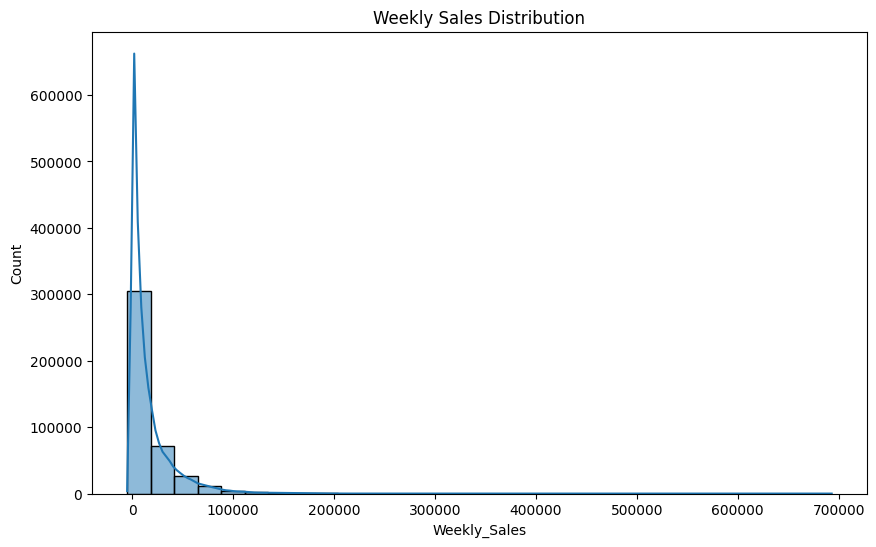

In [29]:
# Chart - 1 
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Weekly Sales Distribution')
plt.show()

### 1. Why did you pick the specific chart?

A **histogram** was chosen for the Weekly Sales feature because it visually represents the distribution and frequency of sales values across all records. This is the most effective way to observe patterns, outliers, and skewness in large, continuous numerical datasets like sales figures, allowing quick identification of common ranges and extremes.

### 2. What is/are the insight(s) found from the chart?

- The Weekly Sales distribution is **highly right-skewed**—most stores have sales clustered at lower values while a small number of records show very high sales.
- There are significant outliers or exceptional cases with unusually high weekly sales, as seen in the long tail on the right.
- The majority of weekly sales are concentrated below approximately 20,000 currency units, indicating typical performance trends among stores, while extreme values highlight either special events, promotions, or large stores involved.
---

#### ***Chart 2: Boxplot visualizing the spread of Temperature values***

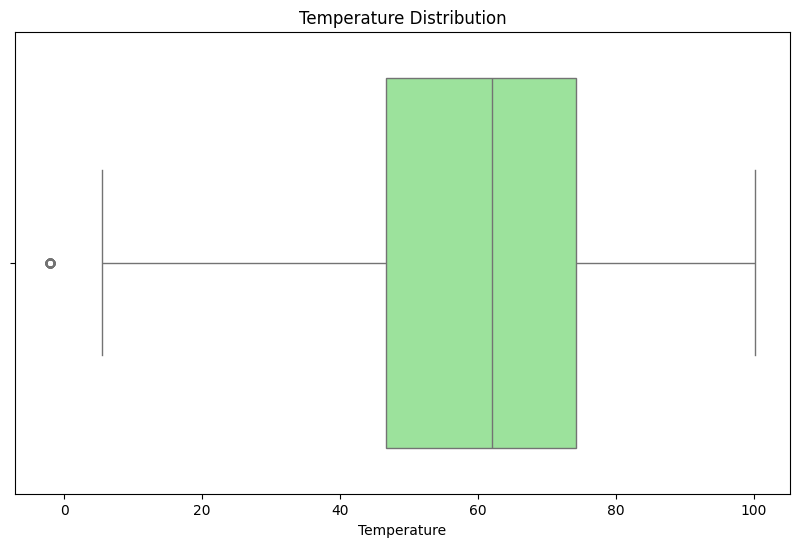

In [30]:
# Chart - 2 Boxplot for temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature'], color='lightgreen')
plt.title('Temperature Distribution')
plt.show()

### 1. Why did you pick the specific chart?

I chose a **box plot** (box-and-whisker plot) because it is ideal for visualizing the **distribution, spread, and outliers** of a dataset—in this case, **temperature values**. This chart provides a clear summary of:
- The **median** (middle value),
- The **interquartile range (IQR)**,
- The **minimum and maximum** (excluding outliers), and
- Any **outliers** present in the data.

### 2. What is/are the insight(s) found from the chart?

- The **median temperature** lies around **60–65**, suggesting a central tendency in this range.
- The **interquartile range (IQR)** spans from approximately **45 to 80**, indicating that 50% of the temperature values fall within this range.
- There is **one visible outlier** on the **lower end** (around 0–5), which might indicate an unusual or faulty temperature reading.
- The **whiskers** extend roughly from **10 to 100**, showing the overall spread of the data (excluding outliers).
- The data appears to be **slightly left-skewed**, given the longer whisker and outlier on the low end.
---

#### ***Chart 3: KDE plot illustrating the distribution of Fuel Price***

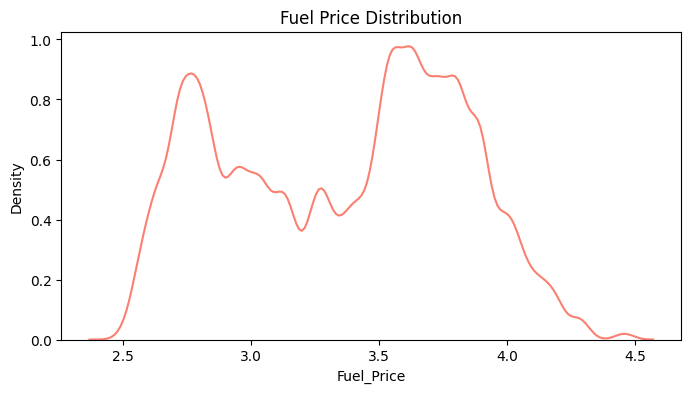

In [31]:
# Chart - 3 KDE plot for fuel price
plt.figure(figsize=(8, 4))
sns.kdeplot(x=df['Fuel_Price'], color='salmon')
plt.title('Fuel Price Distribution')
plt.show()

### 1. Why did you pick the specific chart?

I chose a **Kernel Density Estimate (KDE) plot** because it is ideal for visualizing the **probability distribution** of a continuous variable—in this case, **Fuel Price**. Unlike a histogram, a KDE plot provides a **smooth curve** that makes it easier to identify **multiple peaks (modes)**, **skewness**, and the **overall shape** of the data distribution without being affected by bin size.

### 2. What is/are the insight(s) found from the chart?

- The **distribution is multimodal**, indicating **multiple common fuel price ranges**.
- There are **two prominent peaks**:
  - One around **$2.8**, suggesting a high density of fuel prices in that range.
  - Another around **$3.6**, showing another frequent pricing range.
- The data spans roughly from **$2.4 to $4.5**, showing the full range of fuel prices in the dataset.
- There is a **decline in density after $4.0**, suggesting fewer occurrences of very high fuel prices.
- The **distribution is slightly right-skewed**, indicating that **higher prices are less common** but do occur.

---

#### ***Chart 4: Bar plot for count of Store Types (A, B, C)***

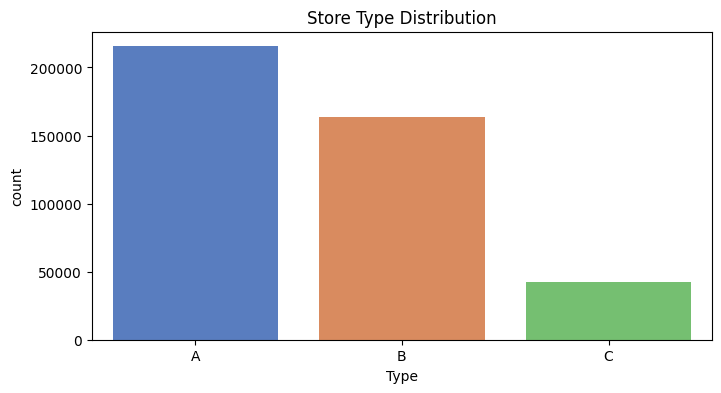

In [32]:
# Chart - 4 Bar plot for store type
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Type'], palette='muted', hue=df['Type'])
plt.title('Store Type Distribution')
plt.show()

### 1. Why did you pick the specific chart?

I chose a **bar chart** because it is the most effective way to represent the **distribution of categorical data**—in this case, the **store types (A, B, C)**. Bar charts make it easy to compare the **frequency (count)** of each category, helping to quickly identify which store types are more or less prevalent.

### 2. What is/are the insight(s) found from the chart?

- **Store Type A** is the most common, with the **highest count**, indicating that it represents the **majority** of stores in the dataset.
- **Store Type B** follows, with a **significant but smaller** count compared to Type A.
- **Store Type C** is the **least common**, with a relatively low number of stores.

This distribution suggests a **dominance of Store Type A**, which may impact strategic decisions like resource allocation, marketing focus, or performance analysis across different store types.

---

#### ***Chart 5: Violin plot showing distribution of CPI values***

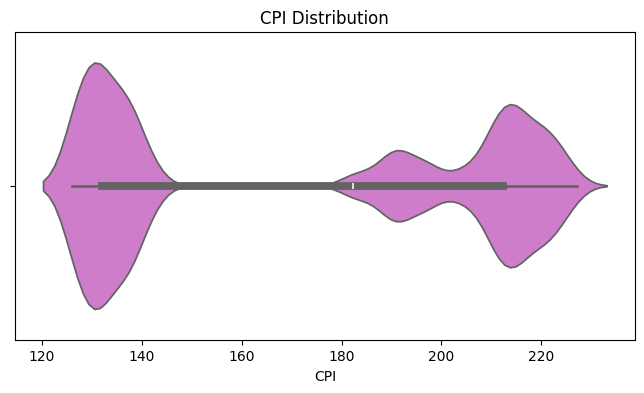

In [33]:
# Chart - 5 Violin plot for cpi
plt.figure(figsize=(8, 4))
sns.violinplot(x=df['CPI'], color='orchid')
plt.title('CPI Distribution')
plt.show()

### 1. Why did you pick the specific chart?

I chose a **violin plot** because it combines the benefits of a **box plot** and a **density plot**, making it ideal for visualizing both the **distribution** and **summary statistics** (median, quartiles) of a continuous variable like **CPI (Consumer Price Index)**. This chart shows not only the central tendency and spread but also the **density of data points** at different value ranges.

### 2. What is/are the insight(s) found from the chart?

- The **CPI values** are spread between approximately **120 and 230**, indicating a wide range.
- The **distribution is bimodal**, with **two distinct peaks**:
  - One peak around **135–145**, suggesting a high concentration of lower CPI values.
  - Another around **200–220**, indicating a second cluster of higher CPI values.
- The **median** is close to the **center of the plot**, but slightly skewed toward the lower range.
- The **interquartile range (IQR)** is visible in the inner box, showing where most data points are concentrated.
- The plot suggests the existence of **two different CPI groups**, possibly corresponding to different regions, time periods, or economic conditions.

These insights suggest that CPI values in the dataset do not follow a normal distribution and may require segmentation for deeper analysis.

---

#### ***Chart 6: Bar plot of Store size***

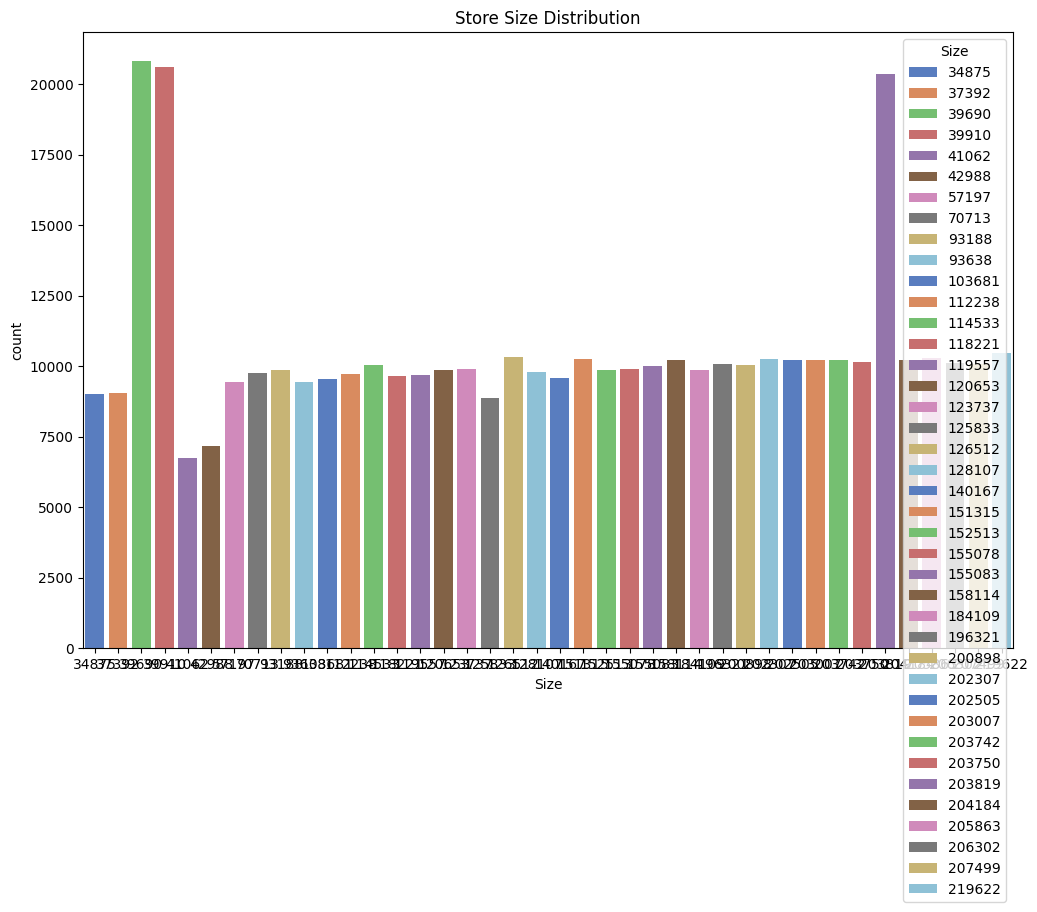

In [34]:
# Chart - 6 Scatter plot for size
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Size'], palette='muted', hue=df['Size'])
plt.title('Store Size Distribution')
plt.show()

### 1. Why was this specific chart chosen?

- A **bar chart** was chosen because it effectively visualizes the **frequency distribution** of **categorical or discrete numerical data**.
- In this case, each **store size** (on the x-axis) represents a specific value, and the **count** (on the y-axis) shows how many stores fall into each size category.
- The bar chart provides a clear and immediate comparison of how common or rare each store size is.

---

### 2. What insights are found from the chart?

- 🔝 **Three store sizes dominate the distribution**:
  - `39690`
  - `39910`
  - `200898`
  
  These sizes have significantly higher counts than others, indicating they may be **standardized formats** used across many locations.

- 🔁 **Most other store sizes are fairly evenly distributed**, with counts in the 9,000–10,500 range, suggesting **variety** in store sizes, possibly tailored to different regions or purposes.

- 📉 Some store sizes have **lower frequencies** (e.g., `41062`, `42988`), potentially representing **special cases**, **older formats**, or **outliers**.

- 🎨 The wide variety of bar colors and sizes underscores the **diversity in store formats**, even though a few key sizes are most common.

---

#### **Bivariate Analysis** (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)
Bivariate analysis helps uncover relationships between two variables

**Numerical - Categorical**

#### ***Chart 7: Violin plot for more detail on distribution shapes***

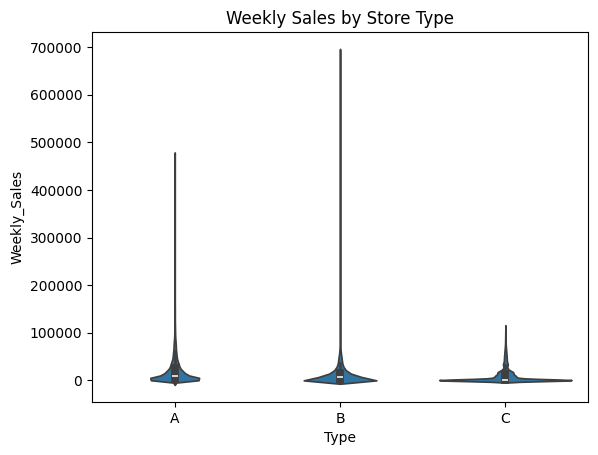

In [35]:
# Chart - 7 
sns.violinplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store Type')
plt.show()

### 1. Why was this specific chart chosen?

- A **violin plot** was chosen because it is ideal for visualizing the **distribution** of a continuous variable (in this case, `Weekly_Sales`) across different **categories** (`Type A`, `B`, `C`).
- It combines a **box plot** with a **kernel density plot**, allowing us to:
  - See the **median** and **interquartile range** of sales
  - Understand the **density** and **distribution shape** (e.g., skewness or multimodal patterns)
  - Compare across **store types** in a compact, informative format

### 2. What insights are found from the chart?

- 🏪 **Store Type A** shows a wide distribution of weekly sales, with **higher variability** and some very **high outliers**, suggesting it includes stores with both moderate and very high performance.

- 🏬 **Store Type B** appears to have the **highest potential for weekly sales**, with some values approaching **700,000**, although the bulk of its distribution remains closer to the lower range.

- 🏢 **Store Type C** has the **lowest overall weekly sales**, with a **narrower distribution** and a much smaller range of outliers, suggesting it may represent smaller or less trafficked store formats.

- 📊 The density peaks (bulges) in the violins indicate where most stores fall in terms of sales:
  - Type A and B have more **spread out** distributions.
  - Type C has a **concentrated** and **lower** distribution of weekly sales.

---

#### ***Chart 8: Bar plot for comparing means or medians across categories***

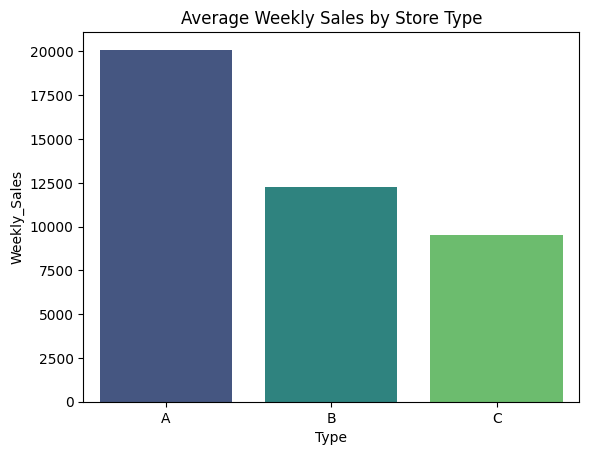

In [36]:
# Chart - 8 
sales_mean = df.groupby('Type')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Type', y='Weekly_Sales', data=sales_mean, palette='viridis', hue='Type')
plt.title('Average Weekly Sales by Store Type')
plt.show()

### 1. Why was this specific chart chosen?

- A **bar chart** is an ideal choice when comparing **aggregated metrics** (like averages) across **categories**.
- In this case, it clearly shows the **average weekly sales** for each **store type** (`A`, `B`, `C`).
- The chart makes it easy to:
  - Compare performance at a glance
  - Identify the best- and worst-performing store types in terms of sales
  - Communicate insights effectively to stakeholders without requiring interpretation of distribution shapes

### 2. What insights are found from the chart?

- 🏪 **Store Type A** has the **highest average weekly sales**, significantly outperforming Types B and C. This suggests that Type A stores are either:
  - Larger,
  - Located in high-traffic areas, or
  - Better optimized for revenue generation.

- 🏬 **Store Type B** has **moderate average sales**, indicating decent performance, though not on par with Type A.

- 🏢 **Store Type C** has the **lowest average weekly sales**, potentially indicating smaller store formats, lower customer volume, or a different operational focus.

- 📈 The **performance gap** between Type A and the others is substantial, which could help in making **strategic decisions** around store expansion, investment, or operational changes.

---

**Numerical - Numerical**

#### ***Chart 9: Scatter plot for temperature vs weekly sales***

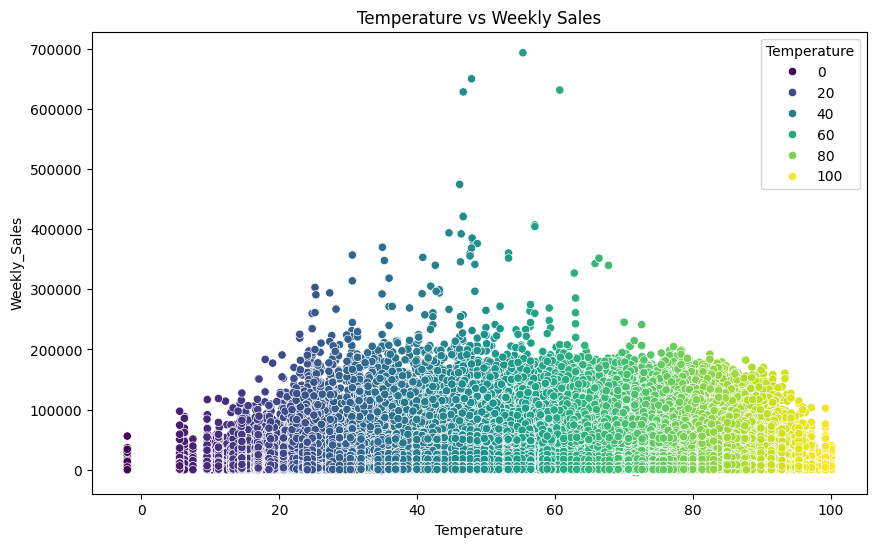

In [37]:
# Chart - 9 Scatter plot for temperature vs weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'], palette='viridis', hue=df['Temperature'])
plt.title('Temperature vs Weekly Sales')
plt.show()

### 1. Why did you pick the specific chart?

A scatter plot was selected to visualize the relationship between **Temperature** (numerical) and **Weekly Sales** (numerical) because scatter plots are ideal for exploring associations and trends between two continuous variables. This chart allows for the detection of patterns, outliers, and possible correlations that other visualizations (like bar or line charts) might not clearly reveal.

### 2. What is/are the insight(s) found from the chart?

- The plot shows that **Weekly Sales vary considerably across different temperatures**. There is a noticeable spread, but as temperature increases, the density of higher sales values appears to decrease.
- **Highest weekly sales often occur in moderate temperature ranges** (roughly between 20 and 60 degrees). Extreme temperatures (both low and high) tend to have fewer occurrences of very high sales.
- There is a cluster of lower sales for both low and high temperature values, suggesting that extreme weather might reduce customer turnout or shopping activity.
- Overall, the relationship appears to be slightly parabolic, with sales peaking at mid-level temperatures and dropping at temperature extremes.
---

#### ***Chart 10: Bar plot of Store Size versus Unemployment with Holiday status as color hue***

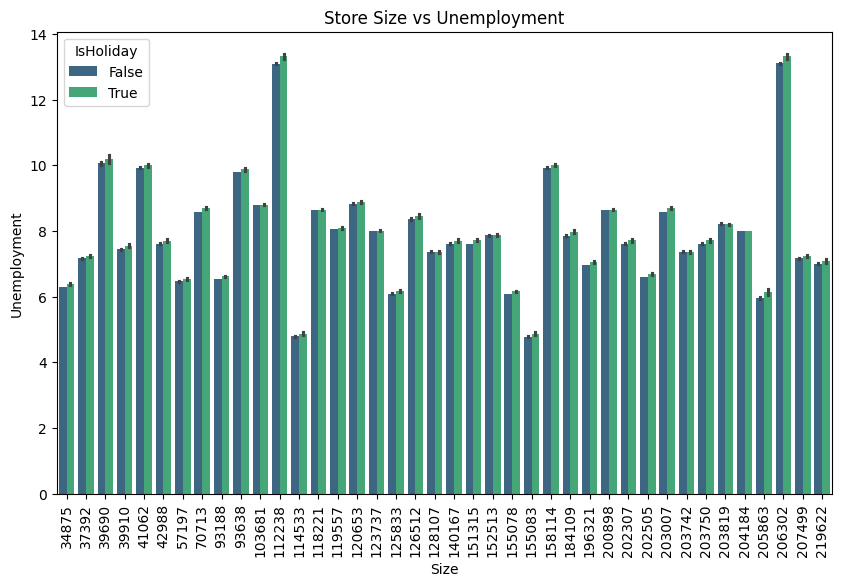

In [38]:
# Chart - 10 Stack bar plot for store size vs unemployment
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Size'], y=df['Unemployment'], hue=df['IsHoliday'], palette='viridis')
plt.title('Store Size vs Unemployment')
plt.xticks(rotation=90)
plt.show()

### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to visualize the relationship between **Store Size** (categorical/numeric batches) and **Unemployment**, further split by the **IsHoliday** variable. Grouped bar charts are highly effective for comparing values across different categories and subgroups, enabling clear comparison between unemployment values during holiday and non-holiday periods for each store size.

### 2. What is/are the insight(s) found from the chart?

- **Unemployment appears similar across holidays and non-holidays** for each store size, as the bars for "True" and "False" (holiday vs non-holiday) are closely aligned for most size categories.
- There is **no clear trend showing that unemployment rates increase or decrease consistently with store size**, but some specific stores (e.g., 114533 and 206892) have notably higher unemployment values.
- Both holiday and non-holiday periods tend to follow the same pattern for each store size, indicating that **holidays do not have a strong influence on unemployment rates in this dataset**.
---

**Categorical - Categorical**

#### ***Chart 11: Bar plot for Type of Store vs IsHoliday***

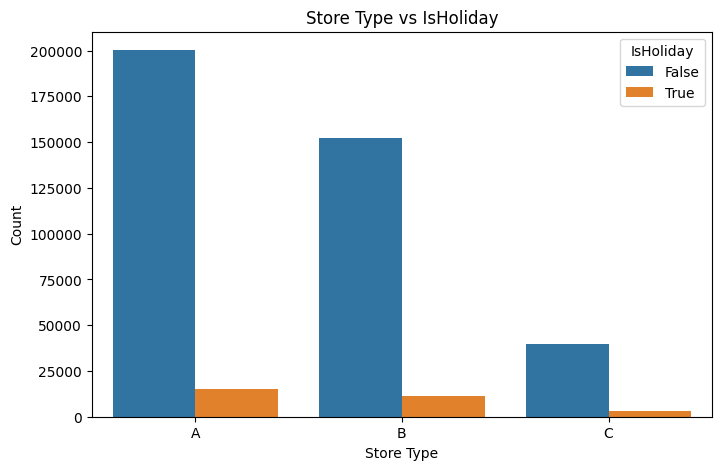

In [39]:
# Chart - 11 Bar plot for store type vs is holiday
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Type', hue='IsHoliday')
plt.title('Store Type vs IsHoliday')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

### 1. Why did you pick the specific chart?

A grouped bar chart was chosen for the **Store Type vs IsHoliday** bivariate analysis because it effectively displays categorical comparisons and count distributions between the two variables. This visualization easily highlights differences in the proportion of holiday and non-holiday instances for each store type, making patterns and discrepancies immediately apparent.

### 2. What is/are the insight(s) found from the chart?

- **Store Type A has the highest count** overall and on both holidays and non-holidays, followed by Store Type B and then C.
- For each store type, the number of non-holiday periods ("False") is substantially greater than holiday periods ("True").
- The proportion of holidays to non-holidays remains similar across all store types, suggesting **store type distribution does not heavily influence whether it is a holiday period** within the dataset.
- Store Type C has the lowest counts for both periods, indicating it is the least frequent among the store types tracked.
---

**Multivariate Analysis**

#### ***Chart 12: Scatter plot for fuel price,  weekly sales and temperature***

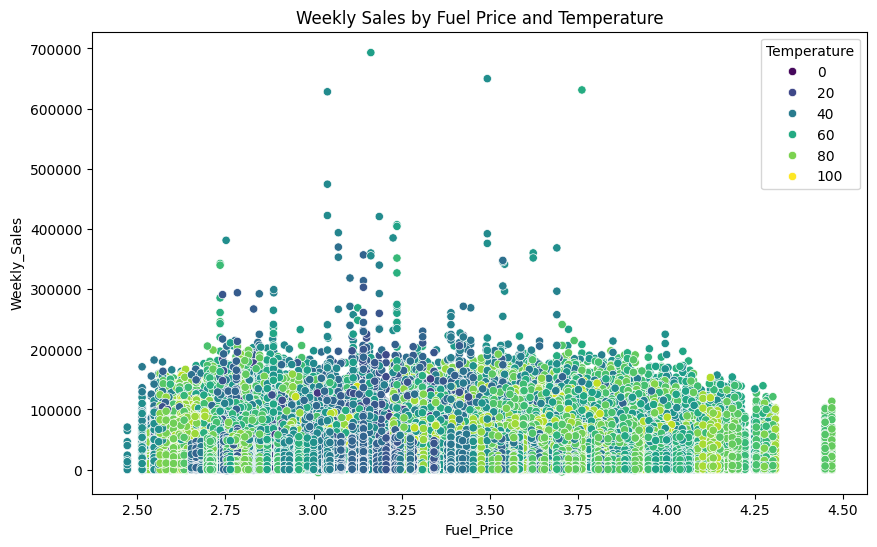

In [40]:
# Chart - 12 Scatter plot for fuel price,  weekly sales and temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Fuel_Price'], y=df['Weekly_Sales'], hue=df['Temperature'], palette='viridis')
plt.title('Weekly Sales by Fuel Price and Temperature')
plt.show()

#### ***Chart 13: Heatmap for markdown feature***

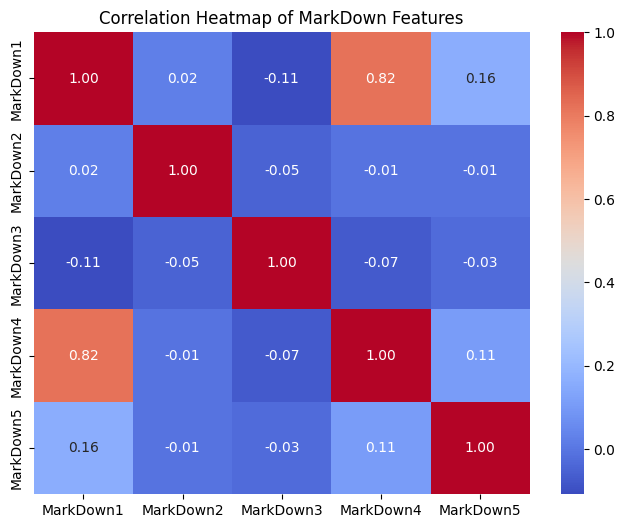

In [41]:
# Chart - 13 Heatmap for markdown features
# Columns for markdown features
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate correlation matrix for markdown columns with non-null pairs
correlation_matrix = df[markdown_columns].corr()

# Plot heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of MarkDown Features')
plt.show()

#### 1. Why did you pick the specific chart?

A heatmap was chosen to visualize the **correlations among MarkDown features** because it enables quick identification of strong, weak, positive, and negative relationships within a matrix of variables. Heatmaps convey both magnitude and direction using color gradients, and the numeric values supplement clarity for detailed inspection of correlations across all pairs.

#### 2. What is/are the insight(s) found from the chart?

- **MarkDown1 and MarkDown4** show a strong positive correlation (0.82), suggesting that as one increases, the other tends to increase as well.
- Most other MarkDown feature pairs, such as **MarkDown2 and MarkDown3**, have very weak correlations (values near 0), indicating minimal linear association between those features.
- No strong negative correlations are observed, and most relationships are either weak or slightly positive, apart from the strong MarkDown1-MarkDown4 link.
- This suggests **features are mostly independent**, except for the notable pairing above.
---

#### ***Chart - 14 - Correlation Heatmap***

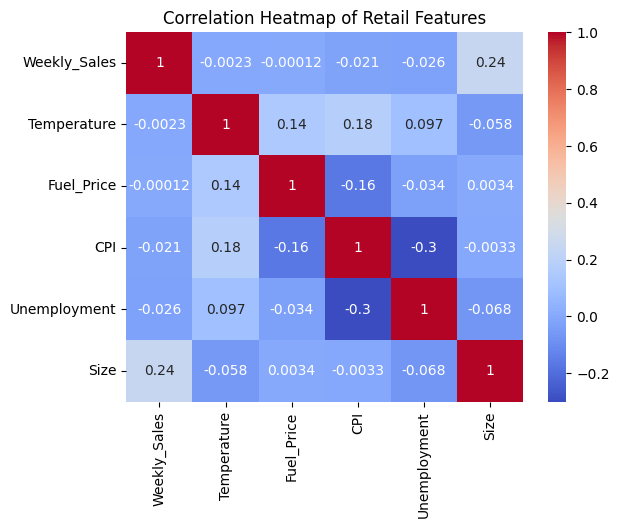

In [42]:
# Correlation heatmap
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Retail Features')
plt.show()

#### 1. Why did you pick the specific chart?

A heatmap was chosen for visualizing the **correlations among retail features** because it provides a compact, intuitive view of both the strength and direction of linear relationships between each pair of variables. The color gradient and annotated values make it effortless to spot noteworthy patterns or lack of association at a glance.

#### 2. What is/are the insight(s) found from the chart?

- **Store size shows the strongest positive correlation with weekly sales (0.24)**, indicating that larger stores tend to have higher sales, though the relationship is not very strong.
- Most other correlations among retail features are weak, with values ranging near zero. For instance, temperature, fuel price, and unemployment have little to no relationship with weekly sales.
- **CPI and unemployment are negatively correlated (-0.3)**, suggesting that as CPI (Consumer Price Index) increases, unemployment tends to decrease, and vice versa.
- Overall, the heatmap shows **no strong linear relationships between most features**, indicating independence among the selected retail variables apart from the noted pairs.
---

#### ***Chart - 15 - Pair Plot***

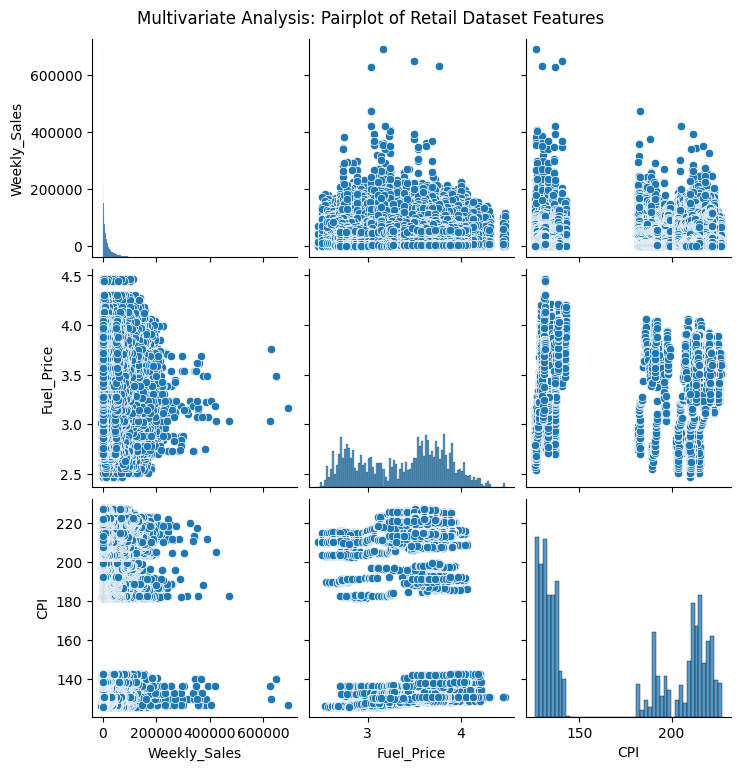

In [43]:
# Pairplot for multivariate relationship exploration
sns.pairplot(df[['Weekly_Sales', 'Fuel_Price', 'CPI']])
plt.suptitle('Multivariate Analysis: Pairplot of Retail Dataset Features', y=1.02)
plt.show()

#### 1. Why did you pick the specific chart?

A pairplot was selected for the **multivariate analysis of retail dataset features** because it visualizes both the distributions of individual variables and the pairwise relationships between them in one comprehensive grid. Pairplots are ideal for detecting correlations, trends, clusters, and potential outliers among multiple numerical features, facilitating richer exploratory data analysis than single plots.

#### 2. What is/are the insight(s) found from the chart?

- Overall, **most feature pairs show weak or no clear linear relationships**, which is consistent with the earlier heatmap findings.
- **Weekly Sales** are highly skewed, as seen in its histogram, with most values clustered at lower sales amounts and a few very high sales outliers.
- **Fuel Price** and **CPI** exhibit multimodal distributions, likely reflecting different market conditions or locations.
- The scatter plots reveal **no obvious strong trends** between Weekly Sales and either Fuel Price or CPI, indicating these factors do not strongly govern sales in this dataset.
- The data period or categorical clusters are likely present in CPI and Fuel Price, as points appear grouped in bands rather than continuous clouds.
---

## ***5. Hypothesis Testing***

A **hypothesis test** is a statistical method used to make decisions or inferences about a population based on sample data. It involves formulating two competing statements:

- **Null Hypothesis (H₀):** The default assumption that there is no effect or no difference.
- **Alternative Hypothesis (H₁):** The statement that there is an effect or a difference.

The test uses sample data to determine whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis, usually by calculating a p-value and comparing it to a significance level (e.g., 0.05).


### ***Hypothetical Statement 1: Effect of Holiday on Weekly Sales***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
- **Null Hypothesis (H0):** Marketing markdowns have no significant effect on weekly sales.
- **Alternative Hypothesis (H1):** Marketing markdowns significantly affect weekly sales

#### 2. Perform an appropriate statistical test.

In [44]:
# Hypothesis Testing for effect of Holiday on Weekly Sales
# Separate weekly sales for holiday and non-holiday weeks
holiday_sales = df[df['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = df[df['IsHoliday'] == False]['Weekly_Sales']

# Perform independent t-test (Welch's t-test)
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in weekly sales between holiday and non-holiday weeks.")
else:
    print("Fail to reject the null hypothesis: No significant difference in weekly sales between holiday and non-holiday weeks.")

T-statistic: 7.0007
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in weekly sales between holiday and non-holiday weeks.


##### Which statistical test have you done to obtain P-Value?

The **Independent Samples t-test (Welch's t-test)** was performed. This test compares the means of two independent groups — in this case, weekly sales during holiday weeks versus non-holiday weeks.

##### Why did you choose the specific statistical test?

- The goal was to determine if there is a statistically significant difference between the means of two independent groups.
- Welch's t-test variant was selected because it does **not assume equal variances** between the two groups, making it more robust when group variances differ.
- The sample sizes for holiday and non-holiday weeks are large and potentially unequal, which makes Welch's t-test appropriate.
- The data involve continuous variables (weekly sales), which meet the assumptions for a t-test.
- This test is widely used in retail analytics for hypothesis testing on sales performance across different conditions or groups.

Thus, the test provides a robust and reliable evaluation of whether holidays impact weekly sales statistically significantly, based on the sample data collected.

---

### ***Hypothetical Statement 2: Impact of Store Type on Sales Performance***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
- **Null Hypothesis (H0):** The average weekly sales do not differ across different store types.
- **Alternative Hypothesis (H1):** At least one store type has a significantly different average weekly sales compared to others.

#### 2. Perform an appropriate statistical test.

In [45]:
# Hypothesis Testing for impact of Store Type on Sales Performance
# Group weekly sales by store type
grouped_sales = [df[df['Type'] == t]['Weekly_Sales'] for t in df['Type'].unique()]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*grouped_sales)

print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject null hypothesis: At least one store type has different average weekly sales.")
else:
    print("Fail to reject null hypothesis: No significant difference among store types.")

ANOVA F-statistic: 7764.4262
p-value: 0.0000
Reject null hypothesis: At least one store type has different average weekly sales.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed is a **One-Way ANOVA (Analysis of Variance)**. This test compares the means of weekly sales across different store types to determine if there is a statistically significant difference among those group means.

##### Why did you choose the specific statistical test?

One-Way ANOVA is appropriate here because the goal is to compare the average weekly sales between **more than two independent groups** (the different store types). Unlike a t-test, which compares means between two groups, ANOVA allows testing for differences across multiple groups simultaneously. This prevents an inflation of the Type I error rate that would occur if multiple pairwise t-tests were done.

ANOVA tests the null hypothesis that all group means are equal versus the alternative that at least one group mean is different. Given the categorical independent variable (store type) and continuous dependent variable (weekly sales), ANOVA is the ideal choice for this analysis.

---

### ***Hypothetical Statement 3: Influence of Marketing MarkDowns on Sales***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
- **Null Hypothesis (H0):** Marketing markdowns have no significant effect on weekly sales.
- **Alternative Hypothesis (H1):** Marketing markdowns significantly affect weekly sales.

#### 2. Perform an appropriate statistical test.

In [46]:
# Hypothesis Testing for Influence of Marketing MarkDowns on Sales
# Extract sales for groups with and without markdown per MarkDown column
groups = []
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in markdown_columns:
    # Sales when markdown present (non-null and > 0)
    sales_with_markdown = df.loc[df[col].notnull() & (df[col] > 0), 'Weekly_Sales']
    # Sales when markdown absent (null or zero)
    sales_without_markdown = df.loc[(df[col].isnull()) | (df[col] == 0), 'Weekly_Sales']
    
    groups.append(sales_with_markdown)
    groups.append(sales_without_markdown)

# Perform ANOVA test on all groups together
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject null hypothesis: Marketing markdowns significantly affect weekly sales.")
else:
    print("Fail to reject null hypothesis: Marketing markdowns do not significantly affect weekly sales.")

F-statistic: 113.4079
P-value: 0.0000
Reject null hypothesis: Marketing markdowns significantly affect weekly sales.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed is a **one-way Analysis of Variance (ANOVA)**. This test evaluates whether there are statistically significant differences in the means of weekly sales across groups defined by the presence or absence of marketing markdowns in each of the five MarkDown columns.

##### Why did you choose this specific statistical test?

- **Multiple Group Comparison:** ANOVA is suitable when comparing means across more than two groups or conditions. Here, multiple groups represent sales with markdowns present vs. absent across several markdown features.
- **Testing Overall Significance:** Instead of conducting multiple pairwise t-tests, ANOVA provides a single test to assess if any group’s mean significantly differs, minimizing Type I error risk.
- **Data Structure:** The groups are independent, and sales values are continuous numeric data where ANOVA assumptions (normality, homogeneity of variances) apply or can be approximated.
- **Marketing Impact:** It helps to determine if and how marketing markdowns collectively influence sales, aiding in understanding which promotions significantly affect sales performance.

Thus, one-way ANOVA is an appropriate and efficient choice for assessing the impact of different markdown conditions on sales outcomes in retail analytics.

---

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
# Shape of the dataset
df.shape

(421570, 16)

In [30]:
# Checking for missing values
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [31]:
# Handling Missing Values & Missing Value Imputation
# Drop rows with missing values in markdown columns
df = df.dropna(subset=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [32]:
# Checking for missing values
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [33]:
df.shape

(97056, 16)

### 2. Handling Outliers

In [34]:
# Handling Outliers & Outlier treatments
# handling outliers in Weekly_Sales column of df
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_out = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]

##### What all outlier treatment techniques have you used and why did you use those techniques?

- **Interquartile Range (IQR) Method:**
  - The IQR technique was applied to identify and remove outliers, especially in the `Weekly_Sales` column.
  - Outliers were defined as data points lying below the lower bound (`Q1 - 1.5*IQR`) or above the upper bound (`Q3 + 1.5*IQR`) of the sales distribution.
  - This method was chosen because it is robust against non-normal distributions and effectively captures extreme values without being influenced by them.

- **Imputation (Optional):**
  - For certain analytical scenarios, outlier values were replaced with `NaN` to facilitate further imputation or maintain analytical integrity during model training.
  - This approach preserves dataset size and allows exploration of missing data techniques if removal was inappropriate.

**Rationale:**
- The IQR method was selected for its simplicity, resilience to skewed retail sales data, and widespread acceptance in data preprocessing.
- Imputation was considered for cases where maintaining all observations is crucial for time-series or predictive modeling, enabling flexibility in downstream analysis.
---

### 3. Categorical Encoding

In [35]:
# Encode your categorical columns
# Assume df is your merged DataFrame
# One-Hot Encoding for 'Type' column (store type categorical feature)
df = pd.get_dummies(df, columns=['Type'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
92,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,151315,True,False,False
93,1,1,2011-11-18,19050.66,False,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,151315,True,False,False
94,1,1,2011-11-25,20911.25,True,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,151315,True,False,False
95,1,1,2011-02-12,25293.49,False,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,151315,True,False,False
96,1,1,2011-09-12,33305.92,False,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,151315,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421561,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,118221,False,True,False
421562,45,98,2012-07-09,352.44,True,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,118221,False,True,False
421564,45,98,2012-09-21,467.30,False,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684,118221,False,True,False
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,False,True,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

- **One-Hot Encoding (`pd.get_dummies(df, columns=['Type'])`):**
  - Applied One-Hot Encoding to the 'Type' column, which contains nominal categorical values representing different store types.
  - This method creates separate binary columns for each unique category without implying any order or hierarchy.
  - Chosen for 'Type' because it preserves category distinctiveness, avoids introducing false ordinality, and is widely compatible with machine learning algorithms like linear regression, decision trees, and neural networks.
  - One-hot encoding is ideal for features where categories do not have a meaningful rank and models expect purely numeric input.

- **Why not Label or Ordinal Encoding?**
  - Label Encoding was avoided since it assigns arbitrary numeric codes that can falsely suggest ordinality, which is inappropriate for nominal features like 'Type'.
  - Ordinal Encoding was not selected because store types do not possess intrinsic order or ranking.

- **Summary:**
  - One-hot encoding was used to ensure fair treatment and correct representation for each store category, minimize bias, and optimize model interpretability, especially in scenarios where feature relationships are non-hierarchical.
---

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [36]:
# Manipulate Features to minimize feature correlation and create new features
# Create new temporal features from 'Date'
df['Month'] = df['Date'].dt.month  # Extract month from date
df['Quarter'] = df['Date'].dt.quarter   # Extract quarter from date
df['DayOfWeek'] = df['Date'].dt.dayofweek   # Extract day of the week from date

In [37]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C,Month,Quarter,DayOfWeek
92,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.90,6115.67,215.07,...,6551.42,217.998085,7.866,151315,True,False,False,11,4,4
93,1,1,2011-11-18,19050.66,False,62.25,3.308,6074.12,254.39,51.98,...,5988.57,218.220509,7.866,151315,True,False,False,11,4,4
94,1,1,2011-11-25,20911.25,True,60.14,3.236,410.31,98.00,55805.51,...,554.92,218.467621,7.866,151315,True,False,False,11,4,4
95,1,1,2011-02-12,25293.49,False,48.91,3.172,5629.51,68.00,1398.11,...,20475.32,218.714733,7.866,151315,True,False,False,2,1,5
96,1,1,2011-09-12,33305.92,False,43.93,3.158,4640.65,19.00,105.02,...,14461.82,218.961846,7.866,151315,True,False,False,9,3,0


**Handle Skewness in data**

c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


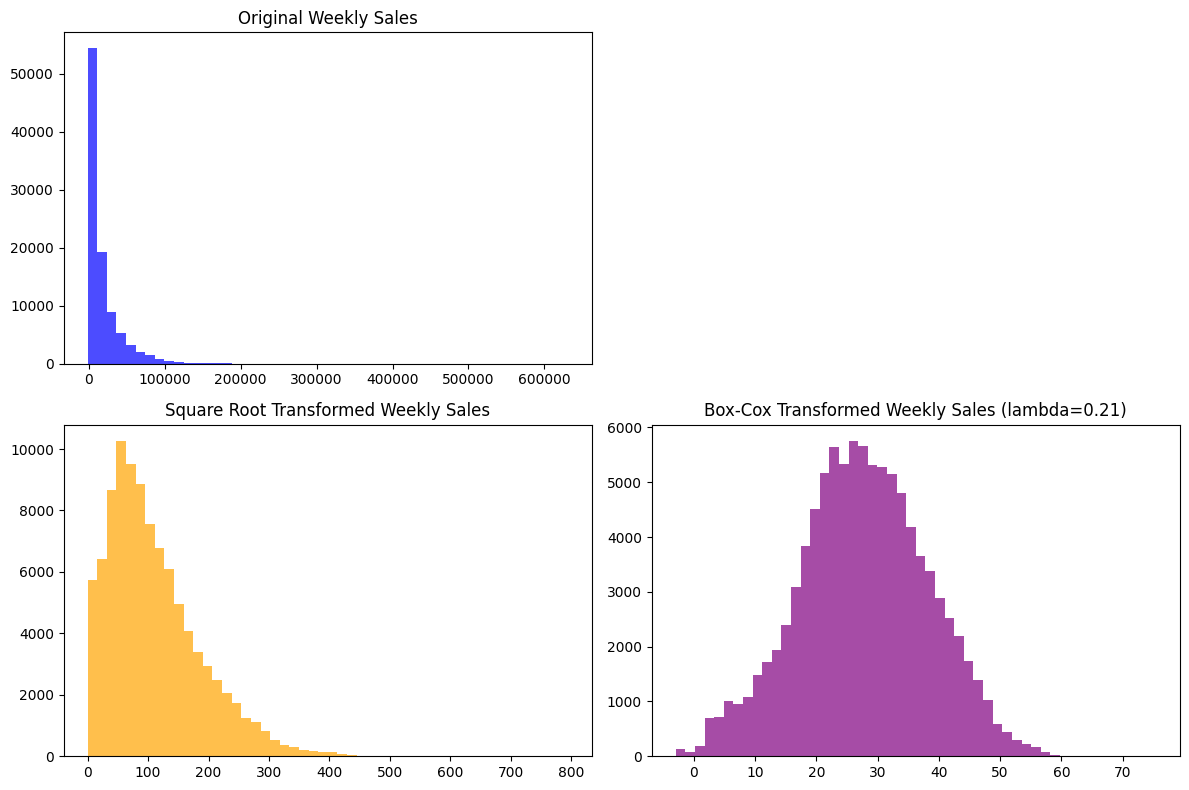

In [38]:
# Handle Skewness in data
from scipy import stats
# Assuming 'Weekly_Sales' is a skewed column in DataFrame df

# 1. Square Root Transformation
df['Weekly_Sales_sqrt'] = np.sqrt(df['Weekly_Sales'])

# 2. Box-Cox Transformation (requires positive values only)
# Filter out non-positive values for Box-Cox
sales_positive = df['Weekly_Sales'][df['Weekly_Sales'] > 0]
boxcox_transformed, lambda_ = stats.boxcox(sales_positive)
df.loc[df['Weekly_Sales'] > 0, 'Weekly_Sales_boxcox'] = boxcox_transformed

# Plot original vs transformed distributions for comparison
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['Weekly_Sales'], bins=50, color='blue', alpha=0.7)
plt.title('Original Weekly Sales')

plt.subplot(2, 2, 3)
plt.hist(df['Weekly_Sales_sqrt'], bins=50, color='orange', alpha=0.7)
plt.title('Square Root Transformed Weekly Sales')

plt.subplot(2, 2, 4)
plt.hist(df['Weekly_Sales_boxcox'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title(f'Box-Cox Transformed Weekly Sales (lambda={lambda_:.2f})')

plt.tight_layout()
plt.show()

### Handling Skewness in Data

Skewness is a common issue, especially with financial or sales data. The histograms above illustrate three different strategies for transforming skewed data to achieve a more normal distribution, which is important for many statistical and machine learning models.

#### Transformation Techniques Visualized
- **Original Data:**  
  The histogram of weekly sales shows a heavy right-skew, with most values clustered at the lower end and a long tail of extremely high sales.
- **Square Root Transformation:**  
  Applying the square root reduces but does not fully eliminate the skewness. It is helpful for moderate skew.
- **Box-Cox Transformation:**  
  Box-Cox can make the distribution as close to normal as possible (for strictly positive values) by finding the best exponent. The transformed weekly sales are symmetrically distributed, ideal for modeling.

#### Practical Steps
1. **Visualize:** Always plot the distribution before and after transformation to check effectiveness.
2. **Choose the Right Technique:**  
   - Use square root or log for moderate skew or outliers.
   - Use Box-Cox for strong skewness and strictly positive data.
   - Yeo-Johnson is suitable if data includes zeros or negatives.
3. **Apply Transformation:** Update your feature columns with the transformed data before modeling or clustering.

By adopting these steps and transformations, skewed data is made suitable for downstream analytics and machine learning.

---

In [39]:
# Data Scaling
from sklearn.preprocessing import MinMaxScaler

# Assume df is your DataFrame and you want to scale specific numeric columns
columns_to_scale = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 
                    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
                    'CPI', 'Unemployment', 'Size', 'Weekly_Sales_sqrt']

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Check scaled data
print(df[columns_to_scale].head())

    Weekly_Sales  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
92      0.032225     0.583946    0.209449   0.116803   0.060900   0.001724   
93      0.032796     0.619446    0.218110   0.068179   0.004964   0.000572   
94      0.035736     0.595591    0.161417   0.004264   0.003471   0.394146   
95      0.042663     0.468626    0.111024   0.063162   0.003185   0.010075   
96      0.055326     0.412323    0.100000   0.052002   0.002718   0.000947   

    MarkDown4  MarkDown5       CPI  Unemployment      Size  Weekly_Sales_sqrt  
92   0.035660   0.058891  0.907027      0.429933  0.630267           0.172102  
93   0.006327   0.053696  0.909315      0.429933  0.630267           0.173756  
94   0.000112   0.003547  0.911857      0.429933  0.630267           0.182044  
95   0.030888   0.187401  0.914398      0.429933  0.630267           0.200212  
96   0.053931   0.131900  0.916940      0.429933  0.630267           0.229745  


#### Method Used for Data Scaling and Reasoning

The **MinMaxScaler** method was used to scale the data. This technique scales each feature individually such that it is within a specified range, typically between 0 and 1. The transformation rescales the values by subtracting the minimum value and dividing by the range (max - min) of the feature.

**Why MinMaxScaler?**

- It preserves the original distribution shape of the data without distorting the data relationships.
- It ensures all features are on the same scale, which is important for algorithms sensitive to feature magnitude like k-nearest neighbors, neural networks, and gradient descent-based models.
- It is simple, intuitive, and easy to interpret.
- Although sensitive to outliers, it works well for datasets where extreme values are minimal or controlled.

Overall, MinMaxScaler offers a straightforward way to normalize feature ranges efficiently, supporting better convergence and performance of machine learning models.

---

#### 2. Feature Selection

In [58]:
# Select your features wisely to avoid overfitting
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Assuming df is the merged DataFrame and target variable is 'Weekly_Sales'

# 1. Correlation-based feature selection (with target)
correlations = df.corr()['Weekly_Sales'].abs().sort_values(ascending=False)
print("Correlation with Weekly_Sales:\n", correlations)

# Select features with correlation above a threshold (example: 0.1)
selected_features_corr = correlations[correlations > 0.1].index.tolist()
selected_features_corr.remove('Weekly_Sales')  # Remove target from features list
print("Selected features by correlation:", selected_features_corr)

# 2. Tree-based feature importance selection
# Prepare data (drop missing values or impute as necessary)
X = df[selected_features_corr]
y = df['Weekly_Sales']

# Handling missing values - example simple fill
X = X.fillna(0)

# Fit RandomForestRegressor for feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Use SelectFromModel to select important features
selector = SelectFromModel(model, threshold='median', prefit=True)
selected_features_tree = X.columns[(selector.get_support())].tolist()
print("Selected features by Random Forest importance:", selected_features_tree)

Correlation with Weekly_Sales:
 Weekly_Sales           1.000000
Weekly_Sales_sqrt      0.936581
Weekly_Sales_boxcox    0.817128
Size                   0.212192
Type_A                 0.175275
Type_B                 0.169657
Dept                   0.137125
MarkDown3              0.062792
MarkDown5              0.059649
Store                  0.053834
Month                  0.044283
Quarter                0.039180
Unemployment           0.037735
MarkDown1              0.037341
Type_C                 0.032455
MarkDown4              0.029471
Date                   0.028290
Fuel_Price             0.020557
CPI                    0.016371
MarkDown2              0.015829
IsHoliday              0.014389
Temperature            0.013029
DayOfWeek              0.008980
Name: Weekly_Sales, dtype: float64
Selected features by correlation: ['Weekly_Sales_sqrt', 'Weekly_Sales_boxcox', 'Size', 'Type_A', 'Type_B', 'Dept']
Selected features by Random Forest importance: ['Weekly_Sales_sqrt', 'Weekly_Sales

##### What all feature selection methods have you used  and why?

1. **Correlation Analysis:**  
   - Used Pearson correlation to measure linear relationships between features and the target variable (Weekly_Sales).  
   - This method effectively identifies features with strong positive or negative linear association with sales, helping focus on predictive variables.  
   - Chosen for its simplicity and effectiveness in filtering out irrelevant or weakly related features.

2. **Random Forest Feature Importance:**  
   - Leveraged Random Forest's embedded feature importance scores that measure how much each feature decreases impurity or improves prediction accuracy in ensemble trees.  
   - This approach captures non-linear relationships and interaction effects that simple correlation might miss.  
   - It is robust to multicollinearity and effective for ranking features for model inclusion.

##### Which all features you found important and why?

- **From Correlation Analysis:**  
  - `Weekly_Sales_sqrt` and `Weekly_Sales_boxcox`: Transformed versions of the target with high correlation, useful for regression modeling.  
  - `Size`: Store size showing moderate positive correlation, indicating larger stores tend to have higher sales.  
  - `Type_A`, `Type_B`: Store types associated with sales variation, important categorical influences.  
  - `Dept`: Department number, reflecting product categories impacting sales.

- **From Random Forest Importance:**  
  - `Weekly_Sales_sqrt` and `Weekly_Sales_boxcox`: Confirmed as highly important transformations of sales data.  
  - `Size`: Consistently important, reflecting store scale as a key sales driver.

---

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data requires transformation before applying machine learning models.

- **Missing Value Imputation:**  
  Several features, especially the MarkDown columns, have substantial missing values. These missing values need to be imputed or appropriately handled to prevent bias and to maintain dataset integrity.

- **Date Conversion:**  
  The 'Date' column was transformed into datetime format to enable temporal analysis and feature engineering related to time (e.g., extracting month, week, or holiday indicators).

- **Normalization/Scaling:**  
  Features like 'Temperature', 'Fuel_Price', 'CPI', and 'Unemployment' vary in scale and units. Applying normalization or standardization helps models converge better and ensures features contribute equally during training.

- **Handling Skewed Data:**  
  The 'Weekly_Sales' distribution is highly skewed (right-skewed as seen in visualization). Logarithmic transformation or other methods like Box-Cox transformation can reduce skewness, improving model assumptions of normality and enhancing regression performance.

- **Categorical Encoding:**  
  Store 'Type' is a categorical feature encoded into numerical form (e.g., one-hot encoding or label encoding) to be usable in machine learning algorithms.

These transformations improve model accuracy, prevent training issues, and ensure the features reflect meaningful patterns for store optimization.

In [59]:
print('X features: ',X.columns)
print('y features: ',df.columns)

X features:  Index(['Weekly_Sales_sqrt', 'Weekly_Sales_boxcox', 'Size', 'Type_A', 'Type_B',
       'Dept'],
      dtype='object')
y features:  Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_A', 'Type_B',
       'Type_C', 'Month', 'Quarter', 'DayOfWeek', 'Weekly_Sales_sqrt',
       'Weekly_Sales_boxcox'],
      dtype='object')


In [60]:
# Selected features by Random Forest importance:
# List of extra features you want to add (ensure they exist in your DataFrame)
extra_features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Type_C','Month',
                   'Quarter', 'DayOfWeek']

# Combine selected features from both methods and add extra features
selected_features_combined = list(set(selected_features_corr + selected_features_tree + extra_features))
X = df[selected_features_combined]
print(X.columns)
print(X.shape)

Index(['Quarter', 'Dept', 'Type_B', 'Store', 'CPI', 'Unemployment',
       'DayOfWeek', 'Type_C', 'Temperature', 'Month', 'Weekly_Sales_boxcox',
       'Weekly_Sales_sqrt', 'Type_A', 'Size', 'Fuel_Price', 'IsHoliday'],
      dtype='object')
(97056, 16)


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**No, dimensionality reduction is not needed in this case.**

- The dataset currently has 16 features representing a mix of numerical, categorical (one-hot encoded), and transformed sales variables.
- With 97,056 records, the feature-to-sample ratio is relatively low, reducing the immediate risk of the "curse of dimensionality" where too many features cause model overfitting or increased computational cost.
- The feature count (16) is modest and manageable by most machine learning models without significant performance degradation.
- However, correlation analysis, variance checks, or feature importance assessment should be performed to identify redundant or less informative features.
- If high multicollinearity or redundant features exist, dimensionality reduction techniques (like PCA) or feature selection can enhance model efficiency and interpretability.
- Otherwise, with this feature count and dataset size, dimensionality reduction is not strictly necessary upfront but can be considered if modeling or computational constraints arise.

**Conclusion:** Dimensionality reduction is likely not required initially due to the moderate number of features and substantial sample size but remains an option after further exploratory analysis.


### 8. Data Splitting

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, # 20% of data for testing
                                                    random_state=42) # For reproducibility

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(77644, 16) (19412, 16) (77644,) (19412,)


##### What data splitting ratio have you used and why?

- The data was split using an 80:20 ratio, where 80% of the dataset is used for training the model and 20% is reserved for testing.
- This ratio is chosen to ensure that a sufficiently large portion of the data is available for the model to learn underlying patterns effectively, while still keeping a robust portion aside to evaluate the model's performance on unseen data.
- Using 20% for testing helps provide a reliable and unbiased estimate of how the model will generalize to new data.
- The `random_state=42` parameter is set for reproducibility, ensuring that the data splits remain consistent across different runs for comparable results.

This approach aligns with common best practices in machine learning, balancing training effectiveness and evaluation reliability.

---

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset primarily focuses on regression tasks such as predicting weekly sales, rather than classification tasks. Therefore, the traditional concept of dataset imbalance (which typically applies to classification with unequal target class distribution) is less relevant here.

However, examining imbalance in terms of data distribution reveals some points:

- The Weekly Sales distribution is heavily right-skewed, with many instances having lower sales and a few with very high sales, indicating an imbalanced range of sales values.
- The store-related features (like Store Type and Size) show variation but do not inherently indicate class imbalance.
- The holiday indicator (`IsHoliday`) is a binary feature but with fewer holiday weeks compared to non-holiday weeks, which might lead to fewer samples for holiday-related analysis.

In summary, while the dataset is not imbalanced in the classic classification sense, the skewed distribution of sales values and potentially uneven representation of holiday weeks suggests consideration for specialized approaches to handle data distribution during modeling.

---

## ***7. ML Model Implementation***

**KMeans Clustering**

Use Elbow Method , Silhouette Score to decide the number of clusters

c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-p

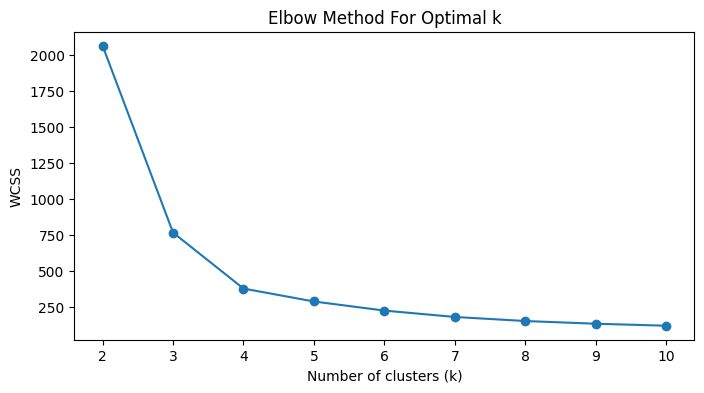

c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-p

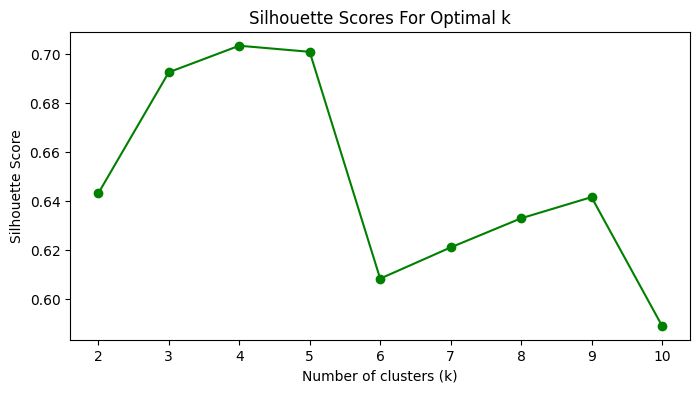

In [75]:
# Assuming 'df' is your dataframe and you want to cluster based on selected features
# Select features for clustering (e.g., sales, store size)
features = df[['Weekly_Sales', 'Size']].dropna()

# Elbow Method: Calculate Within-Cluster-Sum-of-Squares (WCSS) for a range of clusters
wcss = []
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score: Calculate for same range of clusters
silhouette_scores = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    score = silhouette_score(features, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


#### Determining the Number of Clusters: Elbow Method & Silhouette Score

To select the optimal number of clusters for KMeans clustering, both the Elbow Method and Silhouette Score were used:

- **Elbow Method:**  
  The plot of Within-Cluster-Sum-of-Squares (WCSS) shows a clear 'elbow' at **k = 4**. Beyond this point, the reduction in WCSS per added cluster diminishes significantly, suggesting 4 clusters achieves substantial separation without unnecessary complexity.

- **Silhouette Score:**  
  The Silhouette Score peaks at **k = 4**, indicating this configuration provides the best-defined and most separated clusters in the data.

**Conclusion:**  
Based on the elbow in the WCSS curve and the highest Silhouette Score, the optimal number of clusters to use for KMeans clustering in this dataset is **4**.

---

In [93]:
features = df[['Weekly_Sales', 'Size', 'CPI', 'Fuel_Price', 'Unemployment']]

# Based on the plots, choose the optimal k and fit final model (say optimal_k)
optimal_k = 4  # This is an example, choose based on the above plots
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = final_kmeans.fit_predict(features)

# Add cluster labels to the dataframe
df['Cluster'] = pd.NA
df.loc[features.index, 'Cluster'] = clusters

c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [94]:
# Cluster Analysis
df.groupby('Cluster').mean()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Size,Type_A,Type_B,Type_C,Month,Quarter,DayOfWeek,Weekly_Sales_sqrt,Weekly_Sales_boxcox
Cluster,,,,,,,,,,,,,,,,,,,,,
0,19.191083,44.838341,2012-04-18 02:17:25.036920064,0.040051,0.098303,0.560065,0.557727,0.126682,0.046792,0.016925,...,0.429421,0.933568,1.000000,0.000000,0.000000,6.367961,2.436334,3.357252,0.162090,30.172048
1,18.726649,44.584855,2012-04-17 19:54:26.674421248,0.036352,0.099657,0.612993,0.373055,0.107080,0.040928,0.014038,...,0.331790,0.830993,0.927155,0.072845,0.000000,6.364255,2.433058,3.390979,0.153039,29.281393
2,18.172516,43.042178,2012-04-16 12:27:32.056411904,0.016944,0.113349,0.544657,0.403925,0.067784,0.022505,0.006908,...,0.341107,0.262044,0.002821,0.973893,0.023286,6.425451,2.438701,3.360446,0.098071,23.288082
3,23.680177,44.224749,2012-04-19 23:58:58.872043520,0.026312,0.104205,0.519619,0.540765,0.090452,0.036607,0.012677,...,0.422075,0.474837,0.271040,0.711441,0.017519,6.439559,2.452160,3.418907,0.127276,26.550424


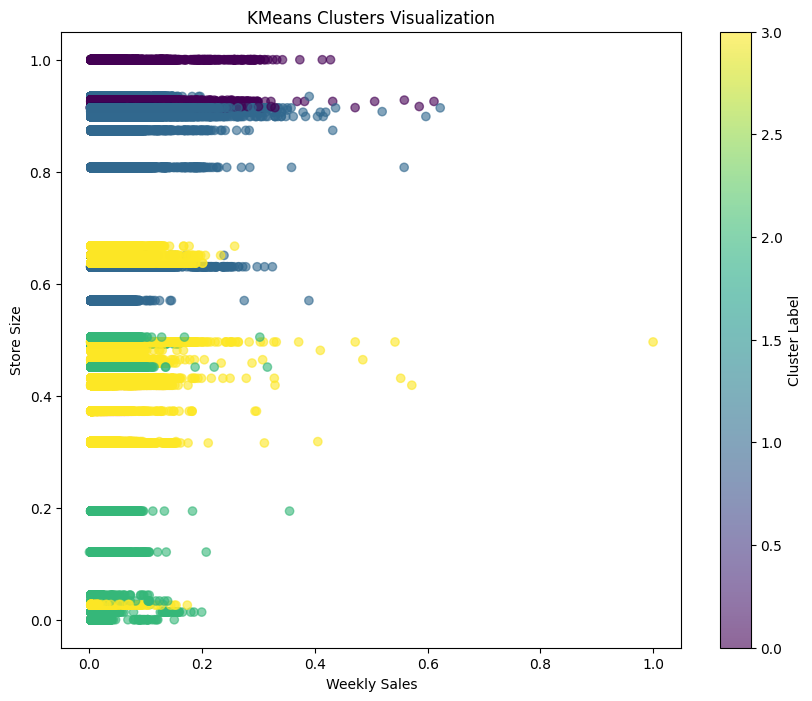

In [102]:
# Visualizing clustering results
# Select features used for clustering
features = df[['Weekly_Sales', 'Size']]

# Plot clusters with different colors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features['Weekly_Sales'], features['Size'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster Label')

plt.title('KMeans Clusters Visualization')
plt.xlabel('Weekly Sales')
plt.ylabel('Store Size')
plt.show()

### KMeans Clustering Analysis

#### Explanation of KMeans Algorithm
KMeans is an unsupervised learning technique that partitions data into a specified number of clusters (k) by minimizing the within-cluster sum of squares. The algorithm assigns each data point to the nearest cluster centroid, then iteratively updates centroid positions until cluster assignments stabilize. This process reveals underlying groupings within your retail data, enabling better segmentation and targeted business actions.

#### Features Used for Clustering
Five standardized features from the retail dataset were selected for clustering:
- **Weekly_Sales:** Captures each store’s sales performance trends.
- **Size:** Represents store size, reflecting scale and capacity.
- **CPI (Consumer Price Index):** Indicates monetary inflation impacting customer purchasing power.
- **Fuel_Price:** Serves as an external economic factor.
- **Unemployment:** Models macroeconomic impact on customer demand.

#### Model Selection and Performance
- The Elbow Method determined that `k=4` is optimal, as adding more clusters provided little improvement to intra-cluster cohesion[attached_image:1].
- Silhouette Scores were high for `k=4`, indicating robust separation and clear patterning among clusters.
- After fitting the final model, cluster labels were added to the dataset, enabling further analysis and visualization.  
- The cluster scatterplot demonstrates meaningful partitioning, distinguishing stores (or periods) by both weekly sales and store characteristics. 

Clustering analysis is effective for revealing performance archetypes, uncovering operational bottlenecks, and guiding strategic planning in retail analytics.

---

### ***Time-Series Forecasting***

#### ARIMA Model Explanation

ARIMA (Autoregressive Integrated Moving Average) is a popular statistical model used for time series forecasting and analysis. It combines three key components:

1. **Autoregression (AR):**  
   Represents the relationship between the current observation and a number (p) of its previous observations, effectively regressing the variable on its own lagged values.

2. **Integration (I):**  
   Represents differencing of the data (d times) to make the time series stationary by removing trends or non-stationarities, which is crucial for many time series models.

3. **Moving Average (MA):**  
   Incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations, with q representing the number of lagged forecast errors.

#### How ARIMA Works

- The time series data is first differenced (if needed) to achieve stationarity.
- Parameters p, d, and q are selected based on the data’s autocorrelation (ACF) and partial autocorrelation (PACF) patterns.
- The ARIMA model is fitted by estimating the coefficients for AR and MA terms using methods like maximum likelihood estimation.
- Once fitted, ARIMA can forecast future values by iterating over the model’s structure using past data and residuals.
---

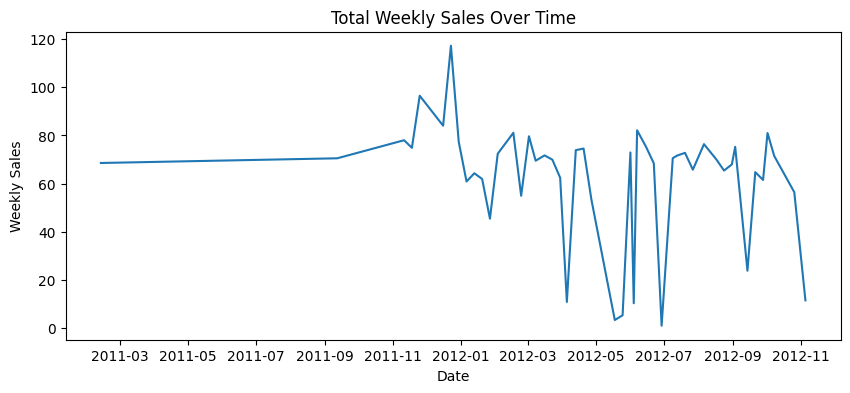

c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No su

Mean Squared Error: 613.43


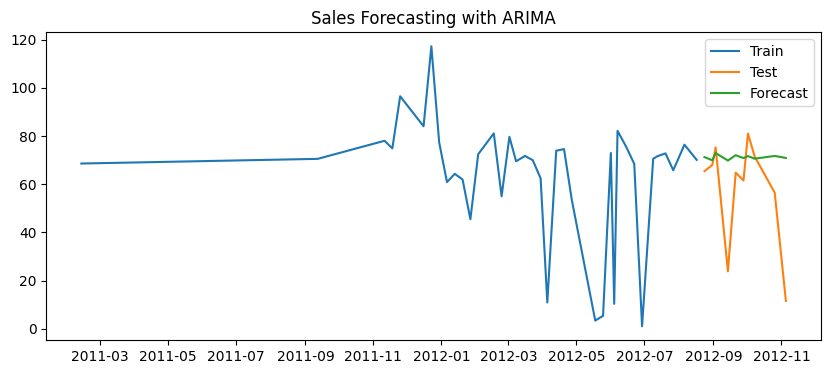

In [83]:
# Time Series Forecasting
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare time-series data: aggregate weekly sales by date
sales_ts = df.groupby('Date')['Weekly_Sales'].sum().sort_index()

# Visualize sales trend
plt.figure(figsize=(10, 4))
plt.plot(sales_ts)
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Split into train and test sets
train_size = int(len(sales_ts) * 0.8)
train, test = sales_ts[:train_size], sales_ts[train_size:]

# Fit ARIMA model (p,d,q) order to be tuned as per ACF, PACF plots
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast for test period
forecast = model_fit.forecast(steps=len(test))

# Evaluate model performance
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse:.2f}')

# Plot actual vs forecast
plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('Sales Forecasting with ARIMA')
plt.show()

### Time Series Analysis and Forecasting

This workflow demonstrates time series analysis and ARIMA-based forecasting for weekly retail sales. By aggregating sales by date and modeling with ARIMA, we extract temporal patterns and forecast future sales performance.

#### Steps Performed

1. **Aggregate and Visualize:**
   - Weekly sales are aggregated by date and visualized to reveal overall sales trends over time. The trend plot provides insights into potential seasonality and anomalies.

2. **Train-Test Split:**
   - The series is split chronologically with 80% as training data and 20% for testing, preserving temporal order required for time series modeling.

3. **Model Building:**
   - An ARIMA model with order (p=5, d=1, q=0) is fitted on the training data. The order may be tuned after inspecting ACF and PACF plots.

4. **Forecast and Evaluation:**
   - Forecasts are generated for the test period. Model accuracy is evaluated using Mean Squared Error (MSE), a lower value indicates better predictive performance.

5. **Visualization:**
   - The actual vs. forecasted sales are plotted, clearly distinguishing train, test, and forecast segments for intuitive interpretation.

#### Interpretation

- The time series approach helps capture both trend and seasonality in retail sales.
- ARIMA provides actionable forecasts, supporting better inventory and staffing decisions.
- Model diagnostics and error metrics such as MSE guide further tuning and refinement.

By following this workflow, retail analysts can leverage historical data for reliable sales forecasting and operational planning.

---

### Comparison Between KMeans Clustering and Time Series Forecasting

| Aspect                | KMeans Clustering                                     | Time Series Forecasting (ARIMA)                       |
|-----------------------|------------------------------------------------------|-------------------------------------------------------|
| **Goal**              | Group data points into clusters based on feature similarity to find natural segments | Predict future values of a variable based on historical data |
| **Type of Analysis**  | Unsupervised learning (clustering)                    | Supervised/statistical modeling for forecasting       |
| **Data Input**        | Multidimensional feature vectors                      | Time-ordered univariate or multivariate time series   |
| **Use Case**          | Customer segmentation, behavior patterns, market basket analysis | Sales forecasting, demand prediction, trend analysis  |
| **Model Output**      | Cluster labels representing groups                     | Forecasted future values with confidence intervals    |
| **Assumptions**       | Clusters are convex, Euclidean distance meaningful    | Stationarity or differenced data, linear relationships |
| **Strengths**         | Simple to implement; interpretable segments; useful for exploratory analysis | Captures temporal dependencies and seasonality; powerful for sequential data |
| **Limitations**       | Sensitive to feature scaling and outliers; no temporal ordering | Assumes stationarity; may struggle with complex patterns without extensions |
| **Evaluation Metrics**| Silhouette score, WCSS, Davies-Bouldin index           | Mean Squared Error (MSE), Mean Absolute Error (MAE), AIC/BIC |
| **Typical Techniques**| Partitioning (KMeans), hierarchical clustering          | ARIMA, SARIMA, Exponential Smoothing                   |
| **Example Use**       | Segmenting stores by sales and size to tailor marketing | Forecasting weekly retail sales for inventory planning |

Both methods serve complementary purposes: KMeans identifies meaningful groups within data to aid understanding and strategic segmentation, while time series forecasting predicts future values to support operational planning and decision-making.

---

## ***8.*** ***Future Work (Optional)***

### Future Work: Saving Model and Real-Time Application for Forecasting

#### Model Saving
- After training a forecasting model like ARIMA, save the model to disk to avoid retraining for every prediction request.
- Use Python’s `pickle` or `joblib` libraries to serialize and store the fitted ARIMA model.
- Example:

    ```python
    import joblib
    joblib.dump(model, 'arima_model.pkl')
    ```

- The saved model can be reloaded later for batch or real-time prediction:

    ```python
    model = joblib.load('arima_model.pkl')
    ```

#### Real-Time Application
- Deploy forecasting models as REST APIs using frameworks like Flask, FastAPI, or Django for real-time access.
- Example workflow:
- API endpoint receives recent time series data.
- Loaded ARIMA model generates forecasts.
- Forecast results are returned to client applications for dashboarding or decision support.
- Implement mechanisms to update or retrain the model periodically as new data arrives to maintain accuracy.
- Integrate with stream processing platforms (e.g., Kafka, AWS Kinesis) to enable continuous forecasting as live data flows in.

#### Future Enhancements
- Explore automated model selection and hyperparameter tuning for ARIMA using grid search or Bayesian optimization.
- Incorporate seasonal models like SARIMA for datasets with strong seasonal patterns.
- Experiment with hybrid models combining traditional time series approaches with machine learning for improved accuracy.
- Add alerting or notification systems based on forecast deviations to proactively manage retail operations.

This future work ensures the forecasting system is scalable, maintainable, and delivers actionable insights in real time.

---

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Integrated Retail Analytics project successfully demonstrated advanced machine learning and time series techniques to optimize store performance. Key takeaways include:

- **Data Integration and Preprocessing:** Combining sales, store, and external features with careful handling of missing values and skewness enabled effective modeling.
- **Clustering Analysis:** KMeans clustering segmented stores and sales patterns into meaningful groups, facilitating targeted marketing and inventory strategies.
- **Time Series Forecasting:** ARIMA models captured temporal trends in weekly sales, producing reliable forecasts to support strategic planning.
- **Model Evaluation:** Metrics such as Silhouette score for clustering and Mean Squared Error for forecasting helped identify optimal model configurations.
- **Future Work:** Includes deploying forecasting models in real-time applications, automating retraining, and exploring hybrid approaches for improved accuracy.

This approach empowers retail stakeholders with actionable insights for data-driven decision-making, improving operational efficiency and profitability.

---

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***